In [1]:
import pandas as pd
import gensim
import seaborn as sns

### This is a small comparison between word2vec models

In [2]:
w2v_model = gensim.models.Word2Vec.load('../script_muazzam/skipGram_model.model')

In [3]:
# This can be downloaded at http://evexdb.org/pmresources/vec-space-models/
#big_model = gensim.models.KeyedVectors.load_word2vec_format('/home/jsilva/winFiles/Downloads/PubMed-and-PMC-w2v.bin', binary=True)

In [2]:
test_features_old = pd.read_csv('../corpus/features/left_features_test.csv')
test_features_new = pd.read_csv('../corpus/features/left_features_test_newF.csv')
train_features_old = pd.read_csv('../corpus/features/left_features_train.csv')
train_features_new = pd.read_csv('../corpus/features/left_features_train_newF.csv')
train_label_old = pd.read_csv('../dataset/final_train.csv', usecols=['ID'])
train_label_new = pd.read_csv('../dataset/final_train_withNewF2.csv', usecols=['ID'])
test_label_old = pd.read_csv('../dataset/final_test.csv', usecols=['ID'])
test_label_new = pd.read_csv('../dataset/final_test_withNewF2.csv', usecols=['ID'])

In [10]:
test_features_old.columns[314-100]

'arg'

In [5]:
def get_cos_sim_rel(word1, model):
    try:
        return model.wv.similarity(word1, 'associated') 
    except (KeyError, TypeError) as  e:  # Sometimes NaN, make 0
        return 0

In [6]:
test_features_new['common_word'] = test_features_new['common_word'].apply(get_cos_sim_rel)
train_features_new['common_word'] = train_features_new['common_word'].apply(get_cos_sim_rel)

TypeError: get_cos_sim_rel() missing 1 required positional argument: 'model'

In [7]:
common_words = pd.concat([test_features_new['common_word'], train_features_new['common_word']])

In [8]:
cos_our_model = common_words.apply(lambda x: get_cos_sim_rel(x, w2v_model))
cos_pub_model = common_words.apply(lambda x: get_cos_sim_rel(x, big_model))

/home/jsilva/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/jsilva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Observations')

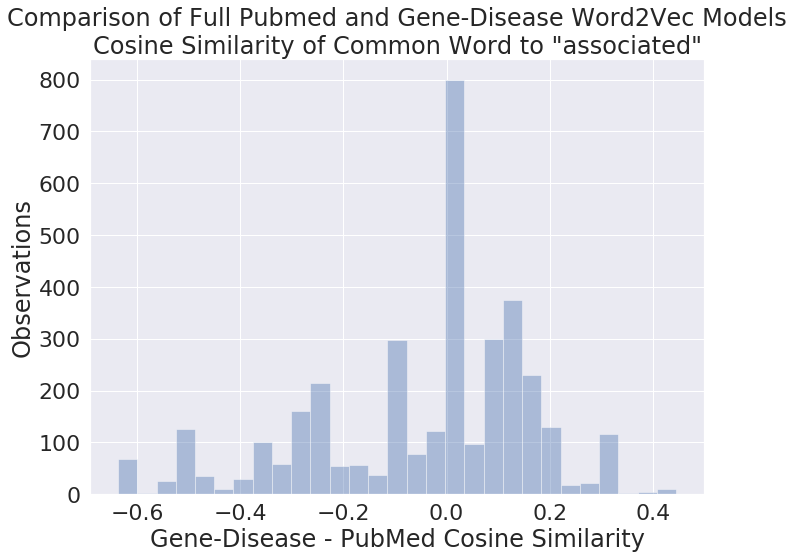

In [10]:
sns.set()
sns.set(rc={'figure.figsize':(11,8)}, font_scale=2)
ax = sns.distplot(cos_pub_model - cos_our_model, kde=False)
ax.set_title('Comparison of Full Pubmed and Gene-Disease Word2Vec Models\n'
             'Cosine Similarity of Common Word to "associated"')
ax.set_xlabel('Gene-Disease - PubMed Cosine Similarity')
ax.set_ylabel('Observations')

In [11]:
def unknown_word(word, model):
    try:
        model[word]
        return 0
    except:
        return 1

In [16]:
print(len(common_words.unique()))
print(common_words.apply(lambda x: unknown_word(x, w2v_model)).sum())
print(common_words.apply(lambda x: unknown_word(x, big_model)).sum())

368
210
123


/home/jsilva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
